# Machine Learning Report

Este proyecto de machine learning se centra principalmente en la exploracion y entrenamientos de modelos los cuales nos ayudaran a tomar una mejor decision en la cestion financiera en este caso de la empresa APPL (apple inc), tomando en cuenta los precios de cierre para de ahi partir en el analisis.

In [1]:
import pandas as pd 
import ta
import optuna
import time
from multiprocessing import Pool
import plotly.graph_objects as go
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
            

c:\Users\pabul\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
random=1234
url = "https://raw.githubusercontent.com/Rerris/Technical_Analysis_Proyect/main/data/aapl_1d_test.csv"

In [9]:
def get_data(url):
    response = requests.get(url, verify=True)
    data = pd.read_csv(StringIO(response.text))
    data=data["Close"]
    data=pd.DataFrame(data)
    data["Closet-1"]=data["Close"].shift(-1)
    data["Closet-2"]=data["Close"].shift(-2)
    rsi_indicator = ta.momentum.RSIIndicator(close=data['Close'], window=14)
    data['RSI'] = rsi_indicator.rsi()
    #MACD
    macd_indicator = ta.trend.MACD(close=data['Close'], window_slow=26, window_fast=12, window_sign=9)
    data['macd'] = macd_indicator.macd()
    data['macd_signal'] = macd_indicator.macd_signal()

    # Crear instancia del indicador EMA con períodos de 13 y 48
    ema_13_indicator = ta.trend.EMAIndicator(close=data['Close'], window=13)
    ema_48_indicator = ta.trend.EMAIndicator(close=data['Close'], window=48)
        
    # Calcular las EMAs 13 y 48 
    data['Ema 13'] = ema_13_indicator.ema_indicator()
    data['Ema 48'] = ema_48_indicator.ema_indicator()
    # Inicializar el indicador EMA con una ventana de 200 períodos
    ema_indicator = ta.trend.EMAIndicator(close=data['Close'], window=200)
    # Calcular la EMA 200

    data['Ema 200'] = ema_indicator.ema_indicator()
    data["Long"] = False
    data["Short"] = False

    for i in range(len(data["Close"])):

        if i + 10 < len(data["Close"]):
            if data["Close"][i] > data["Close"][i + 10]:
                data.loc[i, "Long"] = True
            elif data["Close"][i] < data["Close"][i + 10]:
                data.loc[i, "Short"] = True
    data=data
    return data

# %%        
data=get_data(url).iloc[200:]

# %%
def logistic_regression_long(data):

    X = data[['RSI', 'Ema 13', 'Ema 200']]
    y = data['Long']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar el modelo de regresión logística
    model = LogisticRegression()

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Imprimir el informe de clasificación
    #print(classification_report(y_test, y_pred))

# %%
logistic_regression_long(data)

# %%
def logistic_regression_short(data):

    X = data[['RSI', 'Ema 13', 'Ema 200']]
    y = data['Short']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar el modelo de regresión logística
    model = LogisticRegression()

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Imprimir el informe de clasificación
    #print(classification_report(y_test, y_pred))

# %%
logistic_regression_short(data)

# %%
def support_vector_machine_long(data):

    X = data[['RSI', 'Ema 13', 'Ema 200']]
    y = data['Long']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar el clasificador SVM
    clf = svm.SVC(kernel='linear')  # Puedes cambiar el kernel según tus necesidades (lineal, polinomial, RBF, etc.)

    # Entrenar el modelo
    clf.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

# %%
support_vector_machine_long(data)
# %%
def support_vector_machine_short(data):

    X = data[['RSI', 'Ema 13', 'Ema 200']]
    y = data['Short']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar el clasificador SVM
    clf = svm.SVC(kernel='linear')  # Puedes cambiar el kernel según tus necesidades (lineal, polinomial, RBF, etc.)

    # Entrenar el modelo
    clf.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

# %%
support_vector_machine_short(data)

# %%
def XGBoost_long(data):

    X = data[['RSI', 'Ema 13', 'Ema 200']]
    y = data['Long']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convertir los datos a un formato específico para XGBoost (DMatrix)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Definir los parámetros del modelo
    params = {
        'objective': 'binary:logistic',  # Problema de clasificación binaria
        'eval_metric': 'logloss',  # Métrica de evaluación
        'eta': 0.1,  # Tasa de aprendizaje
        'max_depth': 6,  # Profundidad máxima del árbol
        'subsample': 0.8,  # Proporción de muestras utilizadas para entrenar cada árbol
        'colsample_bytree': 0.8  # Proporción de características utilizadas para entrenar cada árbol
    }

    # Entrenar el modelo
    num_round = 100  # Número de iteraciones de entrenamiento (número de árboles)
    model = xgb.train(params, dtrain, num_round)

    # Predecir en el conjunto de prueba
    y_pred_proba = model.predict(dtest)
    y_pred = [1 if pred > 0.5 else 0 for pred in y_pred_proba]  # Convertir probabilidades en etiquetas binarias

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
# %%
XGBoost_long(data)
# %%
def XGBoost_short(data):

    X = data[['RSI', 'Ema 13', 'Ema 200']]
    y = data['Short']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convertir los datos a un formato específico para XGBoost (DMatrix)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Definir los parámetros del modelo
    params = {
        'objective': 'binary:logistic',  # Problema de clasificación binaria
        'eval_metric': 'logloss',  # Métrica de evaluación
        'eta': 0.1,  # Tasa de aprendizaje
        'max_depth': 6,  # Profundidad máxima del árbol
        'subsample': 0.8,  # Proporción de muestras utilizadas para entrenar cada árbol
        'colsample_bytree': 0.8  # Proporción de características utilizadas para entrenar cada árbol
    }

    # Entrenar el modelo
    num_round = 100  # Número de iteraciones de entrenamiento (número de árboles)
    model = xgb.train(params, dtrain, num_round)

    # Predecir en el conjunto de prueba
    y_pred_proba = model.predict(dtest)
    y_pred = [1 if pred > 0.5 else 0 for pred in y_pred_proba]  # Convertir probabilidades en etiquetas binarias

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

# %%
XGBoost_short(data)

Accuracy: 0.5315315315315315
Accuracy: 0.5405405405405406
Accuracy: 0.5675675675675675
Accuracy: 0.5405405405405406
Accuracy: 0.8648648648648649
Accuracy: 0.8648648648648649


<Axes: >

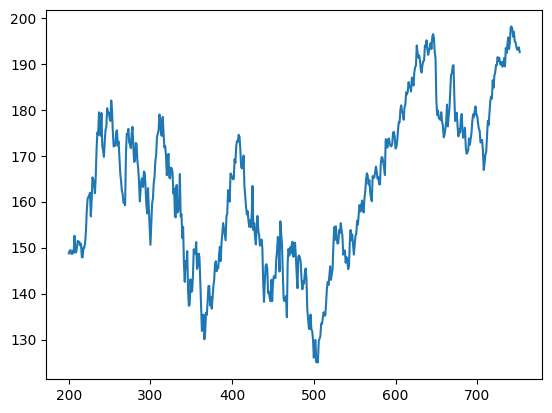

In [12]:
data["Close"].plot()

#### Modelos utilizados dentro de las funciones
Los modelos utilizados fueron ("XGBoost","support vector machine long","Loistic Regression")

Podemos observar el accuracy que tienen nuestros modelos ya siendo entrenados y testeados ajustados a los parametros previamente establecidos tales como "Problema de clasificación binaria, Métrica de evaluación, Tasa de aprendizaje, Profundidad máxima del árbol, Proporción de muestras, Proporción de características utilizadas para entrenar cada árbol utilizadas para entrenar cada árbol"

In [10]:
data.head()

,Close,Closet-1,Closet-2,RSI,macd,macd_signal,Ema 13,Ema 48,Ema 200,Long,Short
200,148.76,149.26,149.48,60.064144,-0.387048,-1.214695,144.366068,145.033400,138.376440,False,True
201,149.26,149.48,148.69,61.062292,0.029030,-0.965950,145.065201,145.205915,138.484734,False,True
202,149.48,148.69,148.64,61.518042,0.372237,-0.698313,145.695887,145.380367,138.594140,False,True
203,148.69,148.64,149.32,58.854117,0.573869,-0.443876,146.123617,145.515454,138.694596,False,True
204,148.64,149.32,148.85,58.680919,0.721314,-0.210838,146.483100,145.642987,138.793555,False,True
